In [20]:
import pandas as pd
import os

path = r'C:\Monash\FIT3161-FIT3163 Computer science & Data science project 1 - S1 2025\Project Concept and DesignData Analysis report\meteoroData_clean\all_states_weather_v3.csv'
# Load dataset
df = pd.read_csv(path)

# Data Overview
print("Data Size:", df.shape)
print("Data Range:")
print(df.describe(include='all'))

# Missing Values Overview
print("Missing Values:")
print(df.isnull().sum())

# Identify Seasonal Trends
# Assume there's a 'month' column and a 'temperature' column
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to show seasonal temperature distribution
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='temperature', data=df)
plt.title('Seasonal Temperature Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.savefig('seasonal_temp_boxplot.png')  # Saves the plot

# Anomaly Detection (extreme values)
# Define extreme values (e.g., temperature below 1 percentile or above 99 percentile)
lower_bound = df['temperature'].quantile(0.01)
upper_bound = df['temperature'].quantile(0.99)

# Count anomalies
anomalies = df[(df['temperature'] < lower_bound) | (df['temperature'] > upper_bound)]
print("Percentage of extreme values:", len(anomalies)/len(df)*100, "%")

# Suggestion: Ignore anomalies if under 1%
if len(anomalies)/len(df) < 0.01:
    print("Extreme values less than 1%, recommended to ignore.")


Data Size: (310695, 9)
Data Range:
              date   state         station  max_Temperature_C  \
count       310695  310695          310695      310695.000000   
unique        1096       3             289                NaN   
top     2024-02-11     NSW  AVALON AIRPORT                NaN   
freq           286  116546            1096                NaN   
mean           NaN     NaN             NaN          24.259339   
std            NaN     NaN             NaN           7.544637   
min            NaN     NaN             NaN          -4.800000   
25%            NaN     NaN             NaN          18.800000   
50%            NaN     NaN             NaN          24.500000   
75%            NaN     NaN             NaN          29.800000   
max            NaN     NaN             NaN          49.400000   

        min_Temperature_C  max_Humidity_pct  min_Humidity_pct  wind_speed_m_s  \
count       310695.000000     309279.000000     309279.000000   310695.000000   
unique                

ValueError: Could not interpret value `month` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

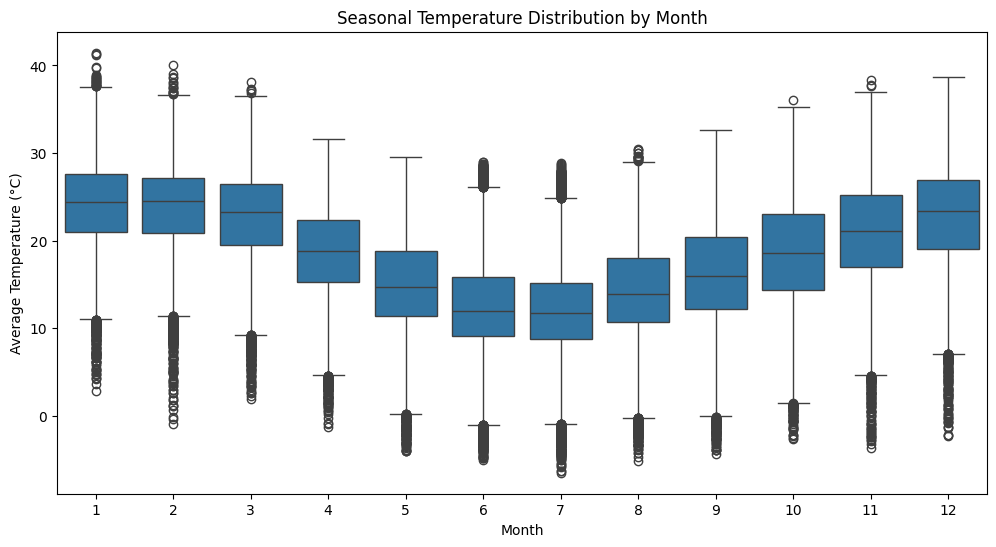

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and parse dates
df = pd.read_csv(path)
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

# 2. Choose/compute temperature column
df['avg_Temperature_C'] = (df['max_Temperature_C'] + df['min_Temperature_C']) / 2

# 3. Drop missing temps
df = df.dropna(subset=['avg_Temperature_C'])

# 4. Plot
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='avg_Temperature_C', data=df)
plt.title('Seasonal Temperature Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.show()

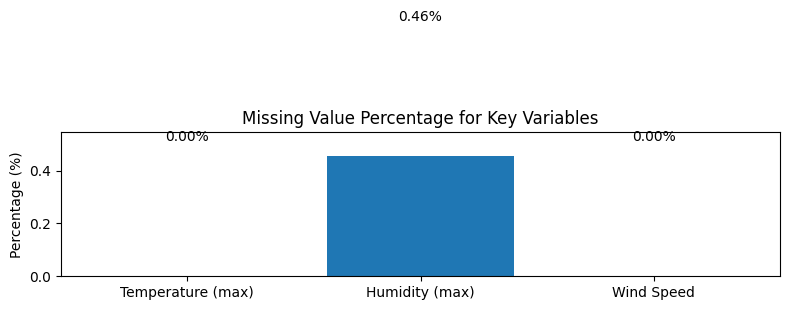

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(path)

# Define columns and labels for plotting
cols = ['max_Temperature_C', 'max_Humidity_pct', 'wind_speed_m_s']
labels = ['Temperature (max)', 'Humidity (max)', 'Wind Speed']

# Calculate missing-value percentages
missing_pct = []
for col in cols:
    pct = df[col].isnull().sum() / len(df) * 100
    missing_pct.append(pct)

# Plot the missing-value percentages
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, missing_pct)
plt.title('Missing Value Percentage for Key Variables')
plt.ylabel('Percentage (%)')
plt.ylim(0, max(missing_pct) * 1.2)

# Annotate each bar with its value
for bar, pct in zip(bars, missing_pct):
    plt.text(bar.get_x() + bar.get_width() / 2, pct + 0.5, f'{pct:.2f}%', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

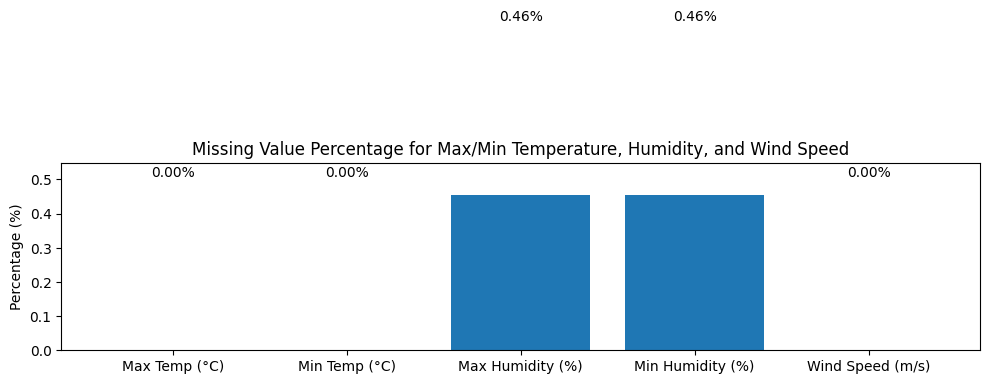

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(path)

# Define columns and labels for plotting (including both max and min)
cols = [
    'max_Temperature_C', 
    'min_Temperature_C', 
    'max_Humidity_pct', 
    'min_Humidity_pct', 
    'wind_speed_m_s'
]
labels = [
    'Max Temp (°C)', 
    'Min Temp (°C)', 
    'Max Humidity (%)', 
    'Min Humidity (%)', 
    'Wind Speed (m/s)'
]

# Calculate missing-value percentages
missing_pct = [(df[col].isnull().sum() / len(df)) * 100 for col in cols]

# Plot the missing-value percentages
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, missing_pct)
plt.title('Missing Value Percentage for Max/Min Temperature, Humidity, and Wind Speed')
plt.ylabel('Percentage (%)')
plt.ylim(0, max(missing_pct) * 1.2)

# Annotate each bar with its value
for bar, pct in zip(bars, missing_pct):
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        pct + 0.5, 
        f'{pct:.2f}%', 
        ha='center', 
        va='bottom'
    )

plt.tight_layout()
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310695 entries, 0 to 310694
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   date               310695 non-null  object 
 1   state              310695 non-null  object 
 2   station            310695 non-null  object 
 3   max_Temperature_C  310695 non-null  float64
 4   min_Temperature_C  310695 non-null  float64
 5   max_Humidity_pct   309279 non-null  float64
 6   min_Humidity_pct   309279 non-null  float64
 7   wind_speed_m_s     310695 non-null  float64
 8   year_month         310695 non-null  object 
dtypes: float64(5), object(4)
memory usage: 21.3+ MB
